In [1]:
import os
os.sys.path.append('/usr/lib/python2.7/dist-packages')

import scapy
from scapy.all import *
import numpy as np
import pickle

# Read the data

In [2]:
#replay = rdpcap('single-MPEG-frame.pcap')
replay = rdpcap('replay_a3.pcap')
indoor = rdpcap('avtp3_b.pcap')

# Label the data

In [3]:
y=np.zeros((len(indoor),1))
replay_packets=[]

In [4]:
for i in replay: 
    b = raw(i)
    k=b
    replay_packets.append(list(k))

In [5]:
count=-1
for i in indoor:
    if(i[0].type==33024):
        count+=1
        b = raw(i)
        k=b
        for j in replay_packets:
            if(list(k)==j):
                y[count]=1
                break
            else:
                y[count]=0

In [6]:
np.unique(y,return_counts=True)

(array([0., 1.]), array([139404,     36]))

In [7]:
indoor_packets=[]
for i in indoor: 
    b = raw(i)
    k=b
    indoor_packets.append(list(k))

In [8]:
indoor_packets=np.array(indoor_packets)
replay_packets=np.array(replay_packets)

In [9]:
replay_packets

array([[145, 224, 240, ..., 177, 253, 190],
       [145, 224, 240, ..., 110,  40, 155],
       [145, 224, 240, ..., 220,  97, 224],
       ...,
       [145, 224, 240, ..., 120, 152, 208],
       [145, 224, 240, ...,  46,  90,   6],
       [145, 224, 240, ..., 191, 175,  52]])

# Group in window

In [230]:
count=0
for i in range(indoor_packets.shape[0]):
    if(i+44<indoor_packets.shape[0]):
        count+=1

In [232]:
d=np.zeros((count,45,438),dtype='uint8')
for i in range(d.shape[0]):
    d[i]=indoor_packets[i:i+45].astype(int)

MemoryError: Unable to allocate 8.04 GiB for an array with shape (437882, 45, 438) and data type uint8

In [ ]:
y1=np.zeros((count,1),dtype='uint8')
for i in range(d.shape[0]):
    y1[i]=y[i+44]

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(d[100], interpolation='nearest')
plt.show()

In [ ]:
d.shape

In [ ]:
y1.shape

In [ ]:
with open('x4.pickle', 'wb') as f:
    pickle.dump(d, f)
with open('y4.pickle', 'wb') as f:
    pickle.dump(y1, f)

# CNN

In [33]:
import tensorflow as tf

In [43]:
X=d.reshape((d.shape[0],d.shape[1],d.shape[2],1))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X,y1, test_size=0.2, stratify=y1,random_state=10)


In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [46]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding="same",input_shape=(45,438,1),activation="relu",kernel_regularizer="l2"))
model.add(tf.keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),padding="same",activation="relu",kernel_regularizer="l2"))
model.add(tf.keras.layers.BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

# Data Analysis

In [238]:
indoor_packets

array([[145, 224, 240, ..., 178,  57, 125],
       [145, 224, 240, ..., 236, 104, 132],
       [145, 224, 240, ...,  93, 123,  43],
       ...,
       [145, 224, 240, ..., 247, 227, 163],
       [145, 224, 240, ...,  38, 137, 196],
       [145, 224, 240, ..., 226, 207, 242]])

In [239]:
np.where(y==1)

(array([ 27658,  27659,  27660, ..., 437923, 437924, 437925]),
 array([0, 0, 0, ..., 0, 0, 0]))

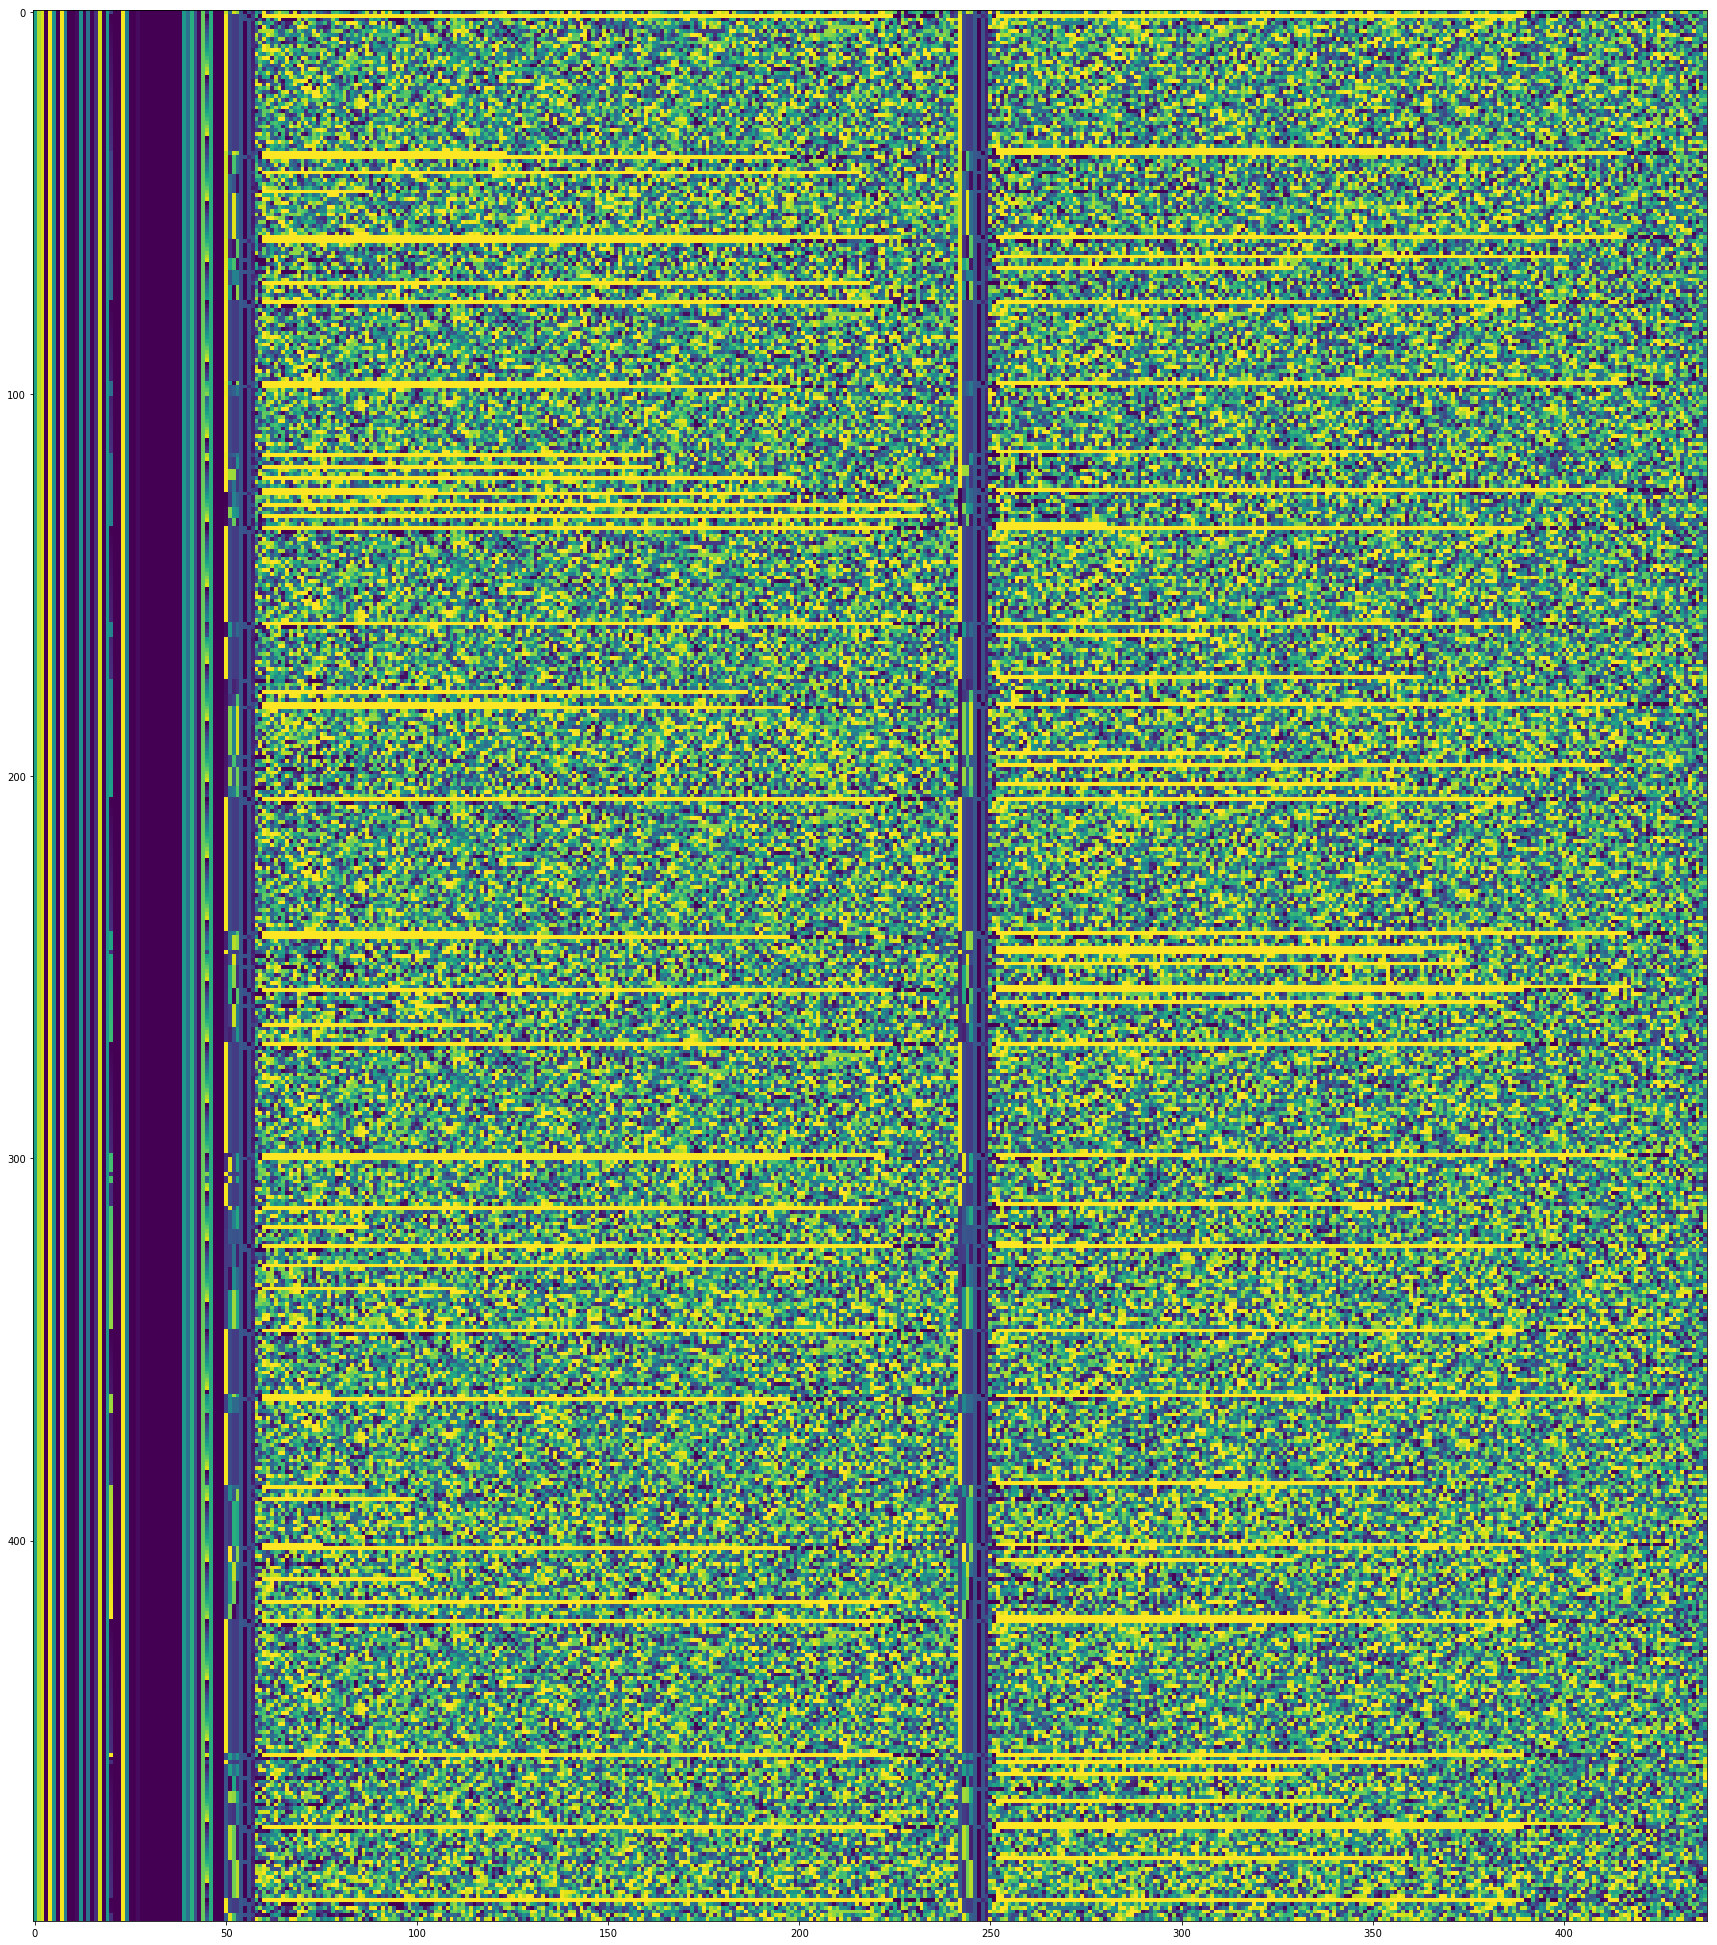

In [246]:
k=indoor_packets[27658:27658+500]
from matplotlib import pyplot as plt
plt.figure(figsize=[30,50])
plt.imshow(k, interpolation='nearest')
plt.show()

In [244]:
k=indoor_packets[0:500]

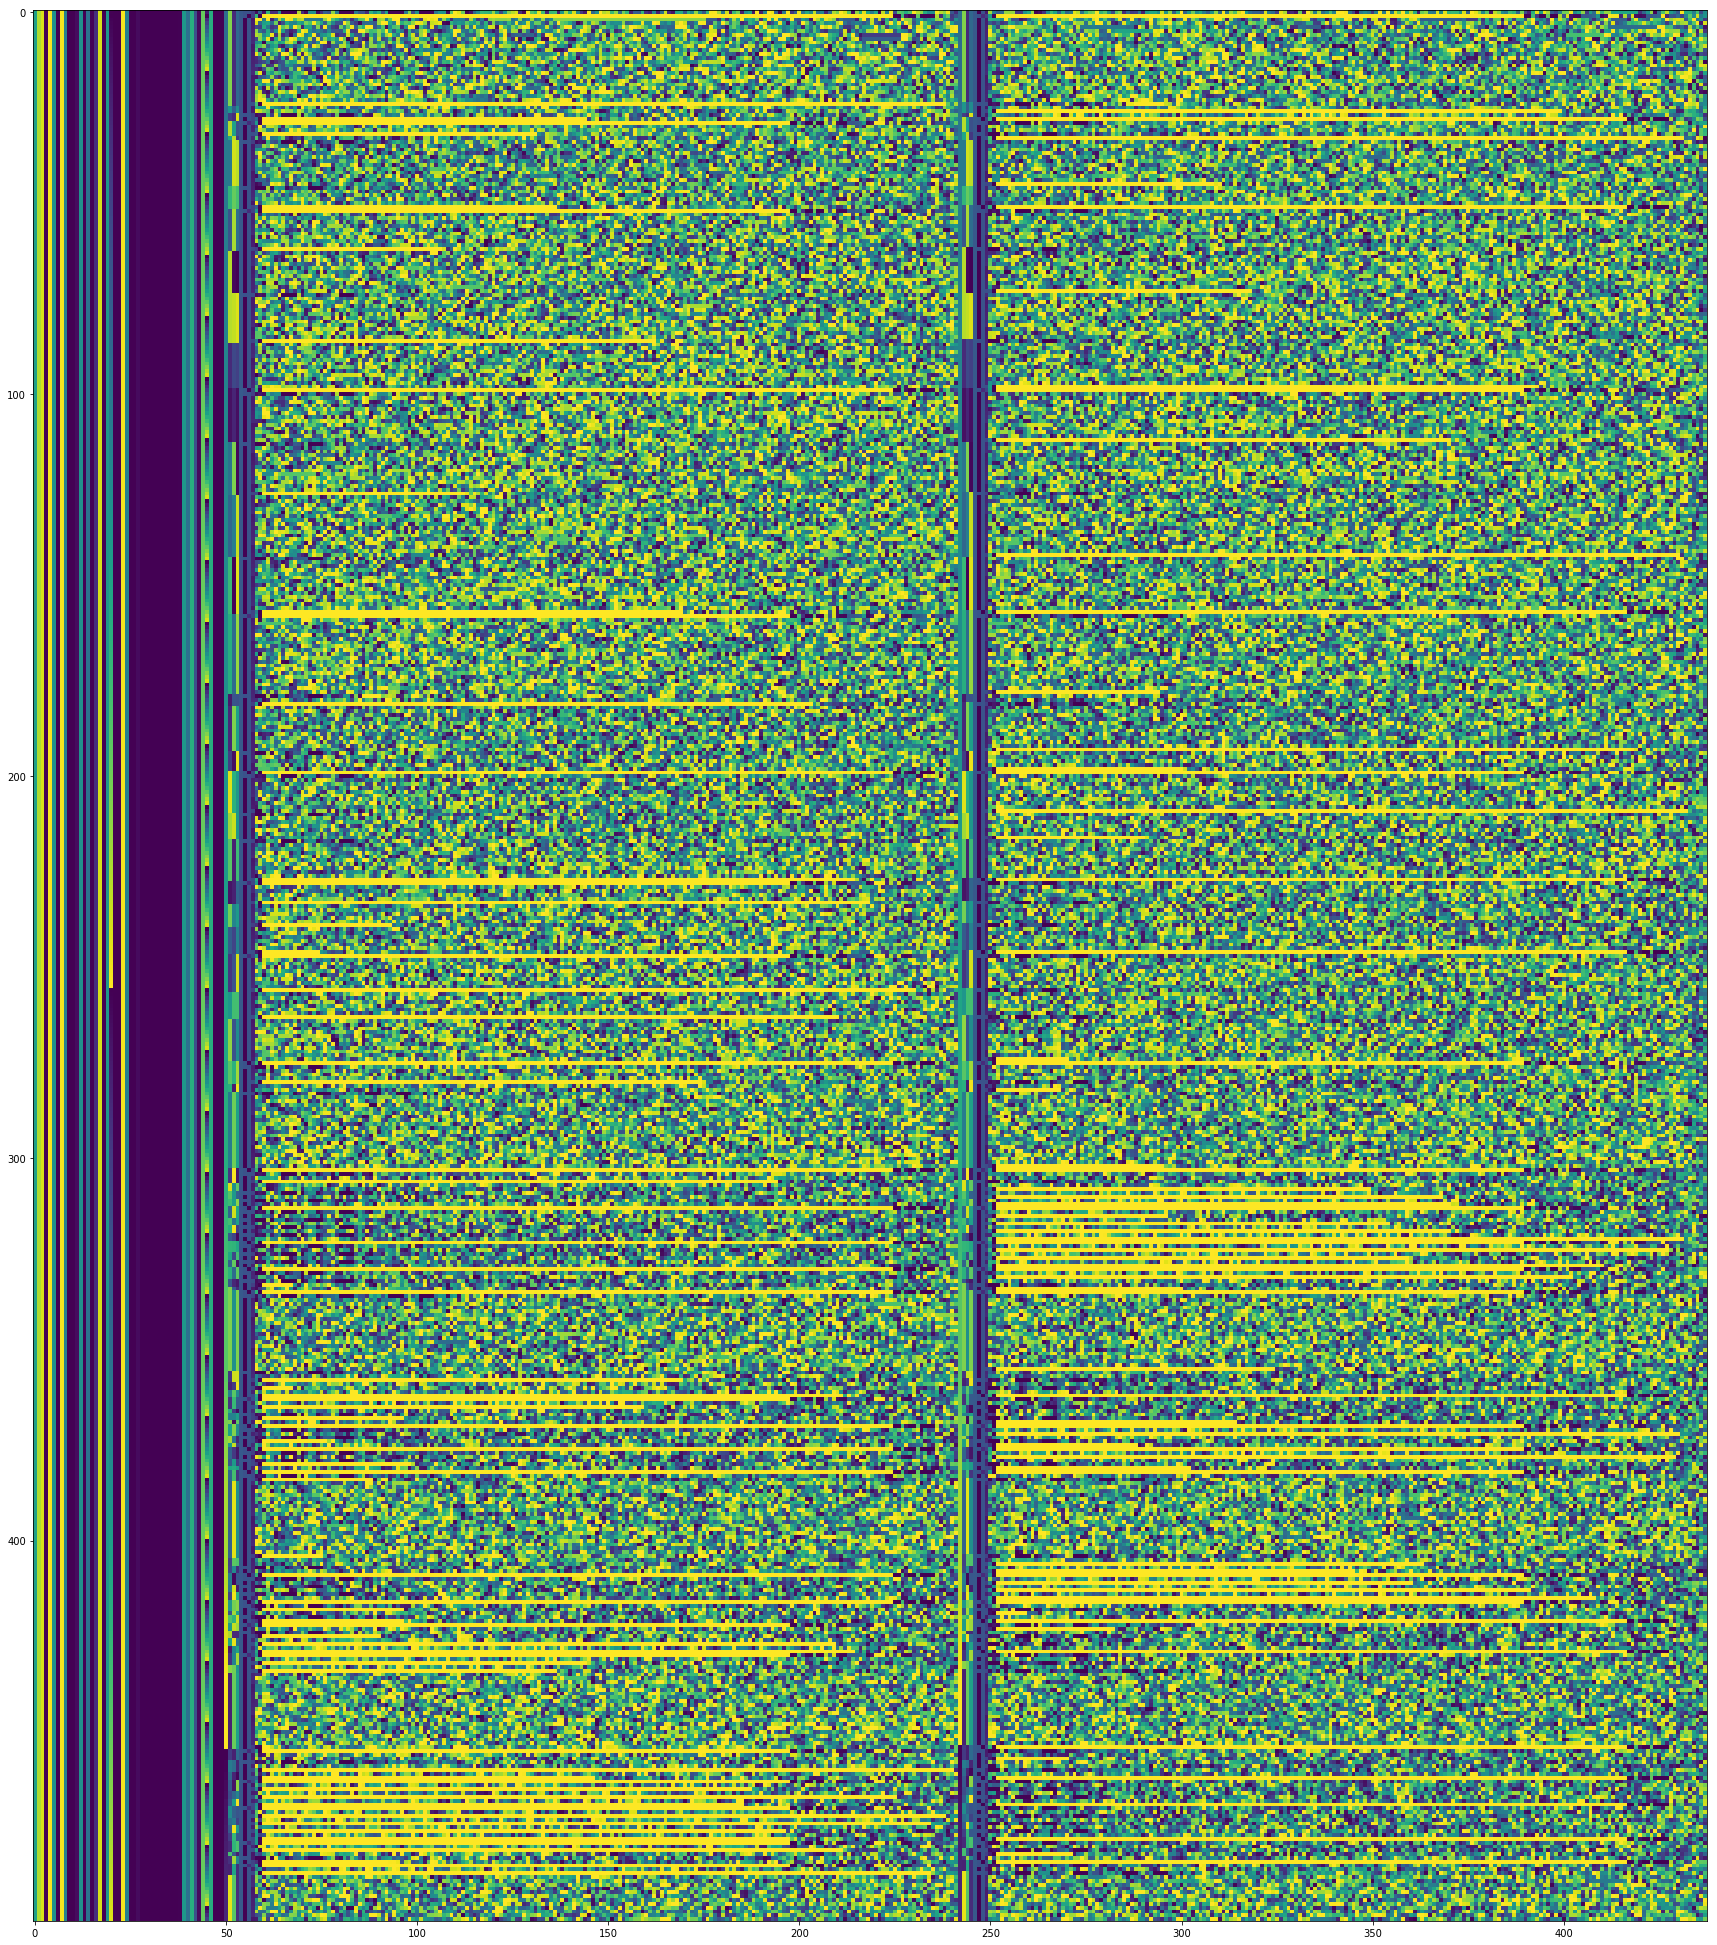

In [245]:
from matplotlib import pyplot as plt
plt.figure(figsize=[30,50])
plt.imshow(k, interpolation='nearest')
plt.show()

In [176]:
indoor_packets[21895][50]

252

In [177]:
indoor_packets[21900][50]

252

# Analysis of mine 

In [180]:
with open('x_avtp11.pickle', 'rb') as f:
    x=pickle.load(f)
with open('y_avtp11.pickle', 'rb') as f:
    y=pickle.load(f)

In [182]:
np.where(y==1)

(array([  400,   401,   402, ..., 12497, 12498, 12499]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [203]:
y[500:1000]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

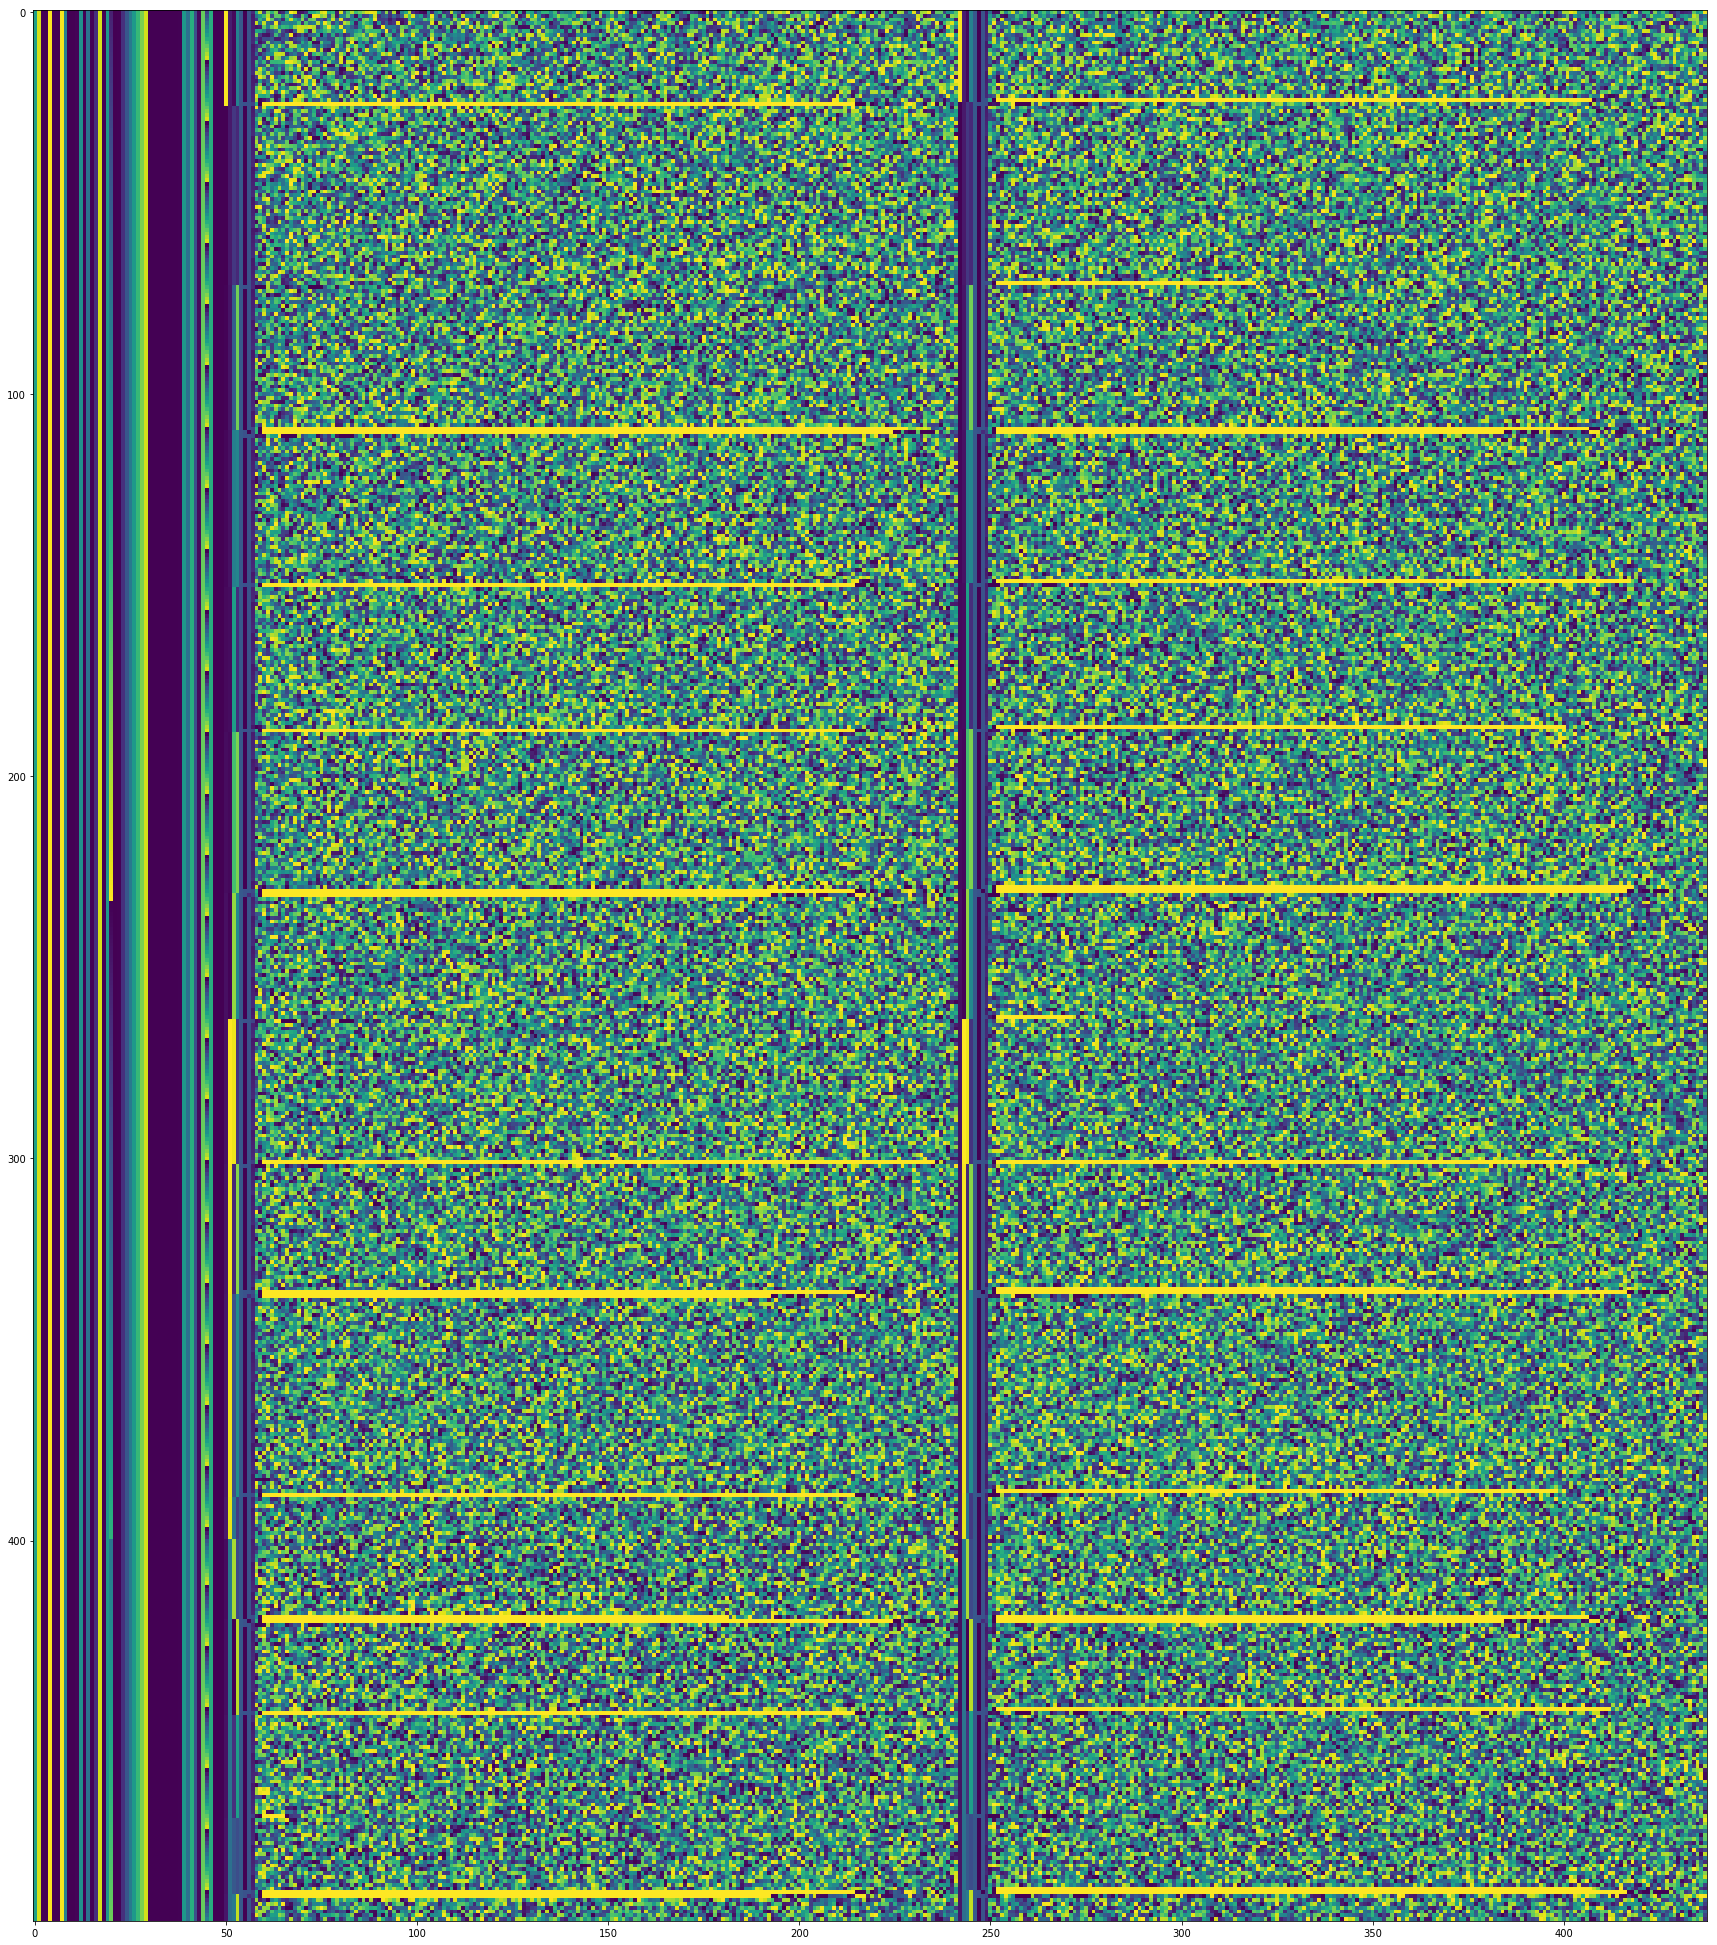

In [204]:
k=x[500:1000]

from matplotlib import pyplot as plt
plt.figure(figsize=[30,50])
plt.imshow(k, interpolation='nearest')
plt.show()